# Load raster data via a tile steam and save as GDAL dataset

In [1]:
import os
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             96584498-4819-4820-a556-834bc1b07358
Session Id:          fcc6b9d5-07b1-4a06-977d-d67c2db91dd4
Session valid until: 2025-09-18T08:22:41.901Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow_def = ge.workflow_builder.operators.GdalSource(dataset="ndvi")
workflow_def = ge.workflow_builder.operators.Downsampling(
    source_operator=workflow_def, output_method="resolution", output_x=0.5, output_y=0.5
)
workflow = ge.register_workflow(workflow=workflow_def)
workflow

a6db7999-78e3-5b7a-b069-87ab9f7554e4

## Define a query rectangle

In [5]:
time_start = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime("2014-06-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")
query = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
)

Create a download dir...

In [6]:
download_dir = "./example_download/"
os.mkdir(download_dir)

## Create a raster writer

In [7]:


writer = ge.RasterWorkflowRioWriter(f"{download_dir}/", workflow, no_data_value=0)

await writer.query_and_write(query)

# Open the local file and display it

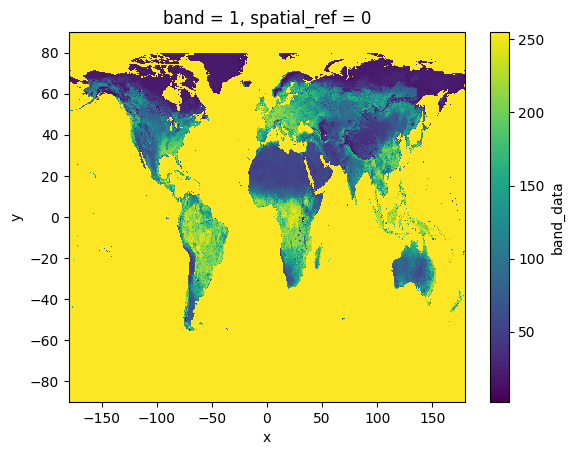

In [8]:
import xarray

xds = xarray.open_dataset(f"{download_dir}2014-04-01_00-00-00.tif", engine="rasterio")
xds["band_data"].plot()

# Now delete the files we created!

In [9]:
expected_files = ['2014-04-01_00-00-00.tif', '2014-05-01_00-00-00.tif', '2014-06-01_00-00-00.tif'] # only download files

for f in expected_files:
    os.remove(f"{download_dir}{f}")

os.rmdir(download_dir) # will only delete empty dirs